<a href="https://colab.research.google.com/github/domsoos/ehacks_2020/blob/master/CNN_Image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Model

In [ ]:
# Load in the data
# CIFAR dataset - Image Classification
cifar10 = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train/255.0, x_test/255.0
y_train, y_test = y_train.flatten(), y_test.flatten()
print("x_train.shape:", x_train.shape)
print("y_train.shape:", y_train.shape)

170500096/170498071 [==============================] - 3s 0us/step
x_train.shape: (50000, 32, 32, 3)
y_train.shape: (50000,)


In [ ]:
# number of classes
K = len(set(y_train))
print("number of classes:", K)

number of classes: 10


In [ ]:
# Build the model using the functional API
# Convolutional Neural Network
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3, 3), strides=2, activation='relu')(i)
x = Conv2D(64, (3, 3), strides=2, activation='relu')(x)
x = Conv2D(128, (3, 3), strides=2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.5)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

In [ ]:
# Compile and fit model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)

Epoch 1/15
1563/1563 [==============================] - 49s 31ms/step - loss: 1.1893 - accuracy: 0.5728 - val_loss: 1.1121 - val_accuracy: 0.6056
Epoch 2/15
1563/1563 [==============================] - 48s 30ms/step - loss: 1.0875 - accuracy: 0.6111 - val_loss: 0.9856 - val_accuracy: 0.6494
Epoch 3/15
1563/1563 [==============================] - 48s 31ms/step - loss: 1.0125 - accuracy: 0.6390 - val_loss: 0.9715 - val_accuracy: 0.6578
Epoch 4/15
1563/1563 [==============================] - 48s 31ms/step - loss: 0.9523 - accuracy: 0.6626 - val_loss: 0.9378 - val_accuracy: 0.6702
Epoch 5/15
1563/1563 [==============================] - 48s 30ms/step - loss: 0.8952 - accuracy: 0.6814 - val_loss: 0.8734 - val_accuracy: 0.6910
Epoch 6/15
1563/1563 [==============================] - 50s 32ms/step - loss: 0.8606 - accuracy: 0.6928 - val_loss: 0.8661 - val_accuracy: 0.6934
Epoch 7/15
1563/1563 [==============================] - 48s 31ms/step - loss: 0.8152 - accuracy: 0.7104 - val_loss: 0.8552 -

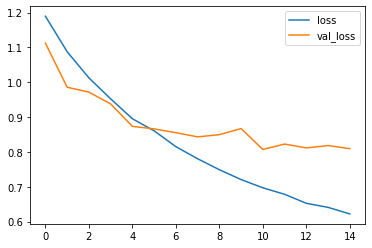

In [ ]:
# Plot loss per iteration
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

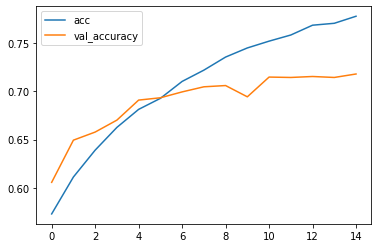

In [ ]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()

Confusion matrix, without normalization
[[695  22  40  26  32   4  13  19  92  57]
 [  8 809   4   9   3   2  12   8  25 120]
 [ 55   4 524  81 122  65  87  39  13  10]
 [ 10   6  43 558  77 166  78  39  10  13]
 [ 11   3  37  73 705  28  56  75   9   3]
 [  1   2  31 243  55 558  42  59   5   4]
 [  4   5  15  66  37  30 831   4   5   3]
 [  5   2   9  32  66  42   5 824   3  12]
 [ 30  29  11  12  14   3  12   7 848  34]
 [ 12  61   4  23  10   6  14  16  25 829]]


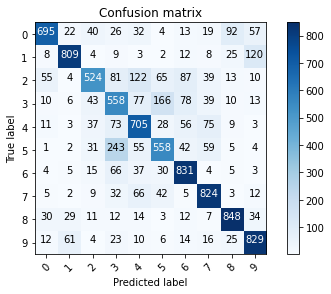

In [ ]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False, 
                          title='Confusion matrix', 
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting 'normalie=True'.
  """
  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print("Normalize confusion matrix")
  else:
    print("Confusion matrix, without normalization")

  print(cm)
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i,j], fmt),
             horizontalalignment="center",
             color="white" if cm[i,j] > thresh else "black")
    
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

In [ ]:
# label mapping
labels = '''airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck'''.split()

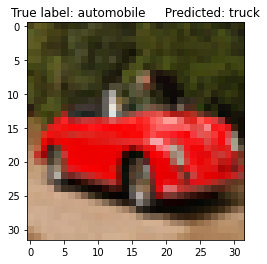

In [ ]:
# Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s     Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));